## Прогнозирование времени дожития пациентов с боковым амиотрофическим склерозом на основее графа водородных связей фермента SOD1.
  
<h3>Задачи работы</h3>
<blockquote>Разработка метода вычисления характеристик графа водородных связей, который позволит отобрать оптимальные наборы характеристик и оптимальные способы расчета, дающие лучший результат прогнозирования. </blockquote>
<blockquote>Построение и исследование регрессионных моделей, связывающих характеристики графа водородных связей, ассоциированных с БАС с дожитием пациентов, являющихся носителями данных мутаций. Предсказание дожития пациентов с мутациями в SOD1.</blockquote>
<blockquote>Анализ результатов построенной регрессионной модели и выделение участков фермента SOD1, влияющих на продолжительность жизни.</blockquote>
В данном блокноте опущен процесс расчета характеристик для графа, но представлены результаты этих расчетов.

In [1]:
!python -V

Python 3.10.4


<h3>Данные хранятся по адресу: https://disk.yandex.ru/d/xl11LO2vfM7juw</h3>

In [6]:
import pandas as pd
path = 'graph_value.csv'
input_data = pd.read_csv(path, sep=',')
input_data.set_index('uid', inplace=True)

<h2>Информация о данных:</h2>
В качестве наименования каждого столбца в данных выступают пациенты и соответствующие им идентификаторы. Последняя строка – это время дожития пациентов с БАС, измеряемое в годах. В первом столбце содержится информация о взаимодействие донора и акцептора.  В остальных столбцах содержится вес, соответствующий стабильности определенной водородной связи. Всего рассматривается 182 связи между донором и акцептором. 

Донор и акцептор – аминокислоты, состоящие из: позиции аминокислотного остатка, имени субъединицы, названии атома. Таким образом, рассматривая пример донора с наименованием 6.A@N: цифра 6 будет являться позицией аминокислотного остатка, буква А после точки будет являться именем субъединицы и буква N, стоящая после знака собачки будет являться названием атома. 

Информация о структуре фермента SOD1 для 72 пациентов имеет 182 признака. Такая структура данных является проблемой так как количество объясняющих переменных гораздо больше чем количество наблюдаемых переменных. По этой же причине высока вероятность возникновения эффекта мультиколлинеарности. 

Мультиколлинеарность – ситуация, когда две или более объясняющие переменные линейно зависимы, что может привести к малоэффективному оцениванию параметров. Увеличивает вероятность возникновения данного эффекта тот факт, что для всех пациентов рассматривается один и тот же белок, у которого водородные связи могут не сильно отличаться друг от друга.

Учитывая все особенности данных, рассматривается построение регрессионных моделей на основе графовых структур, а не на основе информации о стабильности водородных связей аминокислоты.

In [7]:
input_data

,A4T,A4V,A4S,C6G,C6F,V7E,L8Q,G10V,G12A,G12R,...,A140G,G141E,L144F,L144S,A145T,C146R,V148G,V148I,I149T,I151T
uid,,,,,,,,,,,,,,,,,,,,,
4.A@N-20.A@O,0.821000,0.851000,0.817,0.873,0.860,0.848000,0.899,0.901,0.903,0.890,...,0.893,0.876,0.858000,0.921,0.879,0.894,0.832000,0.832000,0.848,0.880
5.A@N-150.A@O,0.906000,0.974000,0.901,0.957,0.921,0.940000,0.916,0.952,0.943,0.945,...,0.936,0.942,0.924000,0.937,0.943,0.958,0.963000,0.931000,0.942,0.948
6.A@N-18.A@O,0.928000,0.899000,0.926,0.937,0.944,0.901000,0.884,0.928,0.936,0.905,...,0.913,0.892,0.922000,0.930,0.900,0.905,0.928000,0.943000,0.929,0.944
8.A@N-16.A@O,0.836000,0.820000,0.840,0.869,0.845,0.857000,0.852,0.761,0.799,0.831,...,0.801,0.844,0.845000,0.799,0.850,0.822,0.839000,0.825000,0.781,0.754
6.A@O-18.A@N,0.908000,0.858000,0.891,0.812,0.908,0.911000,0.903,0.906,0.901,0.913,...,0.902,0.874,0.906000,0.876,0.886,0.913,0.926000,0.918000,0.868,0.867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46.B@NH2-124.B@OD2,0.000000,0.000000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000000,0.000,0.000,0.000,0.000000,0.000000,0.000,0.000
46.A@NH1-139.A@O,0.000000,0.000000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000000,0.000,0.000,0.000,0.000000,0.000000,0.000,0.000
48.B@NE2-61.B@O,0.000000,0.000000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000000,0.000,0.000,0.000,0.000000,0.000000,0.000,0.000


<h2>Построение графа и первый подход к построению обучающей выборки</h2>

Так как водородные связи фермента SOD1 это взаимодействие между донором и акцептором, то по существующим данным можно построить и рассматривать граф. Граф можно построить двумя различными способами.
1.В качестве вершины выступает полное представление донора и акцпетора.
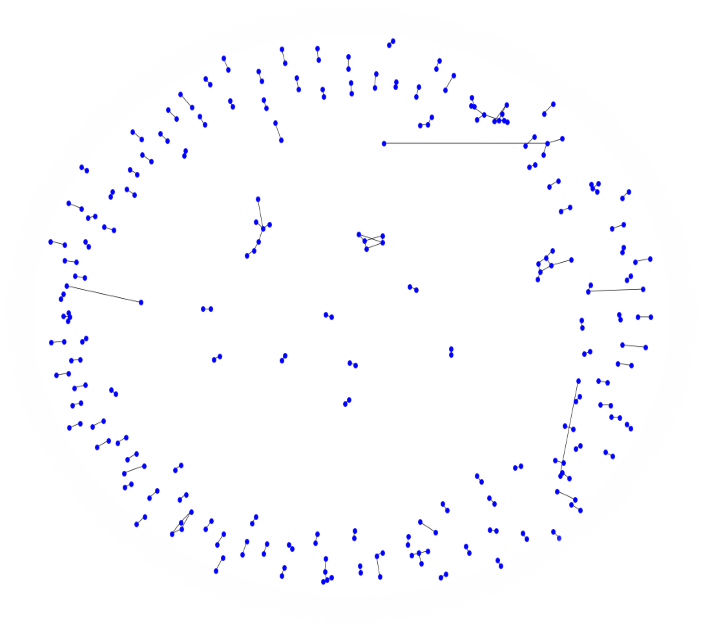
Для каждого пациента фермент представлен в виде такого графа, поэтому можно построить обвучающую выборку следующим образом: расчитать характеристики графа для каждого фермента. Полученная выборка:

In [8]:
characteristic_full_graph = pd.read_csv('Bio/data_for_train/full_graph.csv', sep=';')
characteristic_full_graph = characteristic_full_graph.drop('max_clique', axis=1)
characteristic_full_graph

,Count_Vert,Count_edge,density,degree_assort,estr_index
0,296.0,167.0,0.003825,0.392138,490.815827
1,297.0,167.0,0.003799,0.445879,490.747587
2,299.0,168.0,0.003771,0.445122,494.524522
3,301.0,169.0,0.003743,0.445762,497.610683
4,292.0,166.0,0.003907,0.487694,486.918494
...,...,...,...,...,...
67,299.0,169.0,0.003793,0.450472,496.263781
68,296.0,163.0,0.003733,0.376571,482.688565
69,288.0,161.0,0.003896,0.430011,474.104057
70,297.0,168.0,0.003822,0.449796,493.177620


2.В качестве вершины выступает позиция аминокислотного остатка с субъединицей от донора и акцептора. 
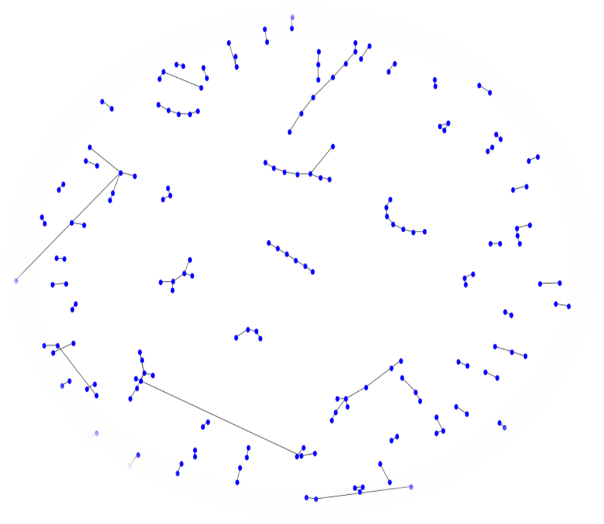
Для каждого пациента фермент представлен в виде такого графа, поэтому можно построить обвучающую выборку следующим образом: расчитать характеристики графа для каждого фермента. Полученная выборка:

In [5]:
characteristic_full_graph_ost = pd.read_csv('Bio/data_for_train/full_graph_ost.csv', sep=';')
characteristic_full_graph_ost = characteristic_full_graph_ost.drop('max_clique', axis=1)
characteristic_full_graph_ost

,Count_Vert,Count_edge,density,tranzitiv,avrg_clast,degree_assort,estr_index
0,189.0,127.0,0.007148,0.112500,0.042857,0.038942,346.769534
1,192.0,127.0,0.006926,0.120000,0.042187,0.067392,348.752608
2,192.0,128.0,0.006981,0.113924,0.042187,0.066946,350.680812
3,193.0,129.0,0.006962,0.112500,0.041969,0.057691,352.951018
4,186.0,126.0,0.007323,0.109756,0.043548,0.059544,343.119380
...,...,...,...,...,...,...,...
67,191.0,129.0,0.007109,0.108434,0.042408,0.079468,351.581794
68,189.0,127.0,0.007148,0.112500,0.042857,0.092934,346.819155
69,185.0,124.0,0.007286,0.113924,0.043784,0.049323,339.356945
70,189.0,128.0,0.007205,0.108434,0.042857,0.075433,348.495633


Строится регресионная модель с помощью метода наименьших квадратов.

In [2]:
import numpy as np
import statsmodels.api as sm

In [7]:
characteristic_full_graph.loc[:, 'const'] = 1
characteristic_full_graph

,Count_Vert,Count_edge,density,degree_assort,estr_index,const
0,296.0,167.0,0.003825,0.392138,490.815827,1
1,297.0,167.0,0.003799,0.445879,490.747587,1
2,299.0,168.0,0.003771,0.445122,494.524522,1
3,301.0,169.0,0.003743,0.445762,497.610683,1
4,292.0,166.0,0.003907,0.487694,486.918494,1
...,...,...,...,...,...,...
67,299.0,169.0,0.003793,0.450472,496.263781,1
68,296.0,163.0,0.003733,0.376571,482.688565,1
69,288.0,161.0,0.003896,0.430011,474.104057,1
70,297.0,168.0,0.003822,0.449796,493.177620,1


In [9]:
y = input_data.loc['Survival time']
y

A4T       1.466037
A4V       1.196581
A4S       0.000000
C6G       0.200000
C6F       1.000000
           ...    
C146R     2.000000
V148G     2.126204
V148I     1.675405
I149T     2.500000
I151T    20.000000
Name: Survival time, Length: 72, dtype: float64

In [9]:
mod = sm.OLS(y.values, characteristic_full_graph.values)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.5632
Date:                Sun, 03 Jul 2022   Prob (F-statistic):              0.728
Time:                        14:34:39   Log-Likelihood:                -222.59
No. Observations:                  72   AIC:                             457.2
Df Residuals:                      66   BIC:                             470.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            13.8654     13.616      1.018      0.312     -13.319      41.050
x2           -11.1835     11.920     -0.938      0.352     -34.983      12.616
x3          5.267e+05   5.13e+05      1.028      0.308   -4.97e+05    1.55e+06
x4            -0.7497     18.553     -0.040      0.968     -37.791      36.292
x5            -0.4509      1.768     -0.255      0.799      -3.980       3.079
const      -4024.8614   3906.580     -1.030      0.307   -1.18e+04    3774.876
==============================================================================
Omnibus:                       22.399   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.550
Skew:                           1.443   Prob(JB):                     3.83e-07
Kurtosis:                       4.231   Cond. No.                     4.61e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.61e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Можно заметить что для модели построенной на представленных данных коэфициент детерминации слишком мал, что означает плохое описание данных

In [10]:
mod = sm.OLS(y.values, characteristic_full_graph_ost.values)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.494
Model:                            OLS   Adj. R-squared (uncentered):              0.440
Method:                 Least Squares   F-statistic:                              9.070
Date:                Sun, 03 Jul 2022   Prob (F-statistic):                    9.21e-08
Time:                        14:34:40   Log-Likelihood:                         -221.19
No. Observations:                  72   AIC:                                      456.4
Df Residuals:                      65   BIC:                                      472.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            11.4444     12.088      0.947      0.347     -12.697      35.585
x2             8.2390      8.848      0.931      0.355      -9.431      25.909
x3          5.371e+04   6.92e+04      0.776      0.440   -8.45e+04    1.92e+05
x4          -997.5349   1330.889     -0.750      0.456   -3655.504    1660.434
x5         -6547.8971   1.04e+04     -0.629      0.531   -2.73e+04    1.42e+04
x6           -14.8520     29.535     -0.503      0.617     -73.837      44.133
x7            -9.2113      9.542     -0.965      0.338     -28.269       9.846
==============================================================================
Omnibus:                       22.714   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.314
Skew:                           1.420   Prob(JB):                     2.61e-07
Kurtosis:                       4.427   Cond. No.                     4.47e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
import numpy.linalg as LA
det = LA.det(np.dot(characteristic_full_graph_ost.values.T, characteristic_full_graph_ost.values))
det

6.611591624674271e-10

Для модели построенное на вычисленных характеристиках для подграфа, где в качестве вершины выступает позиция аминокислотного остатка с субъединицей коэфициент детерминации значительно лучше, чем для первой модели, но сами данные имеют маленький коэффициент дерминации что может означать наличие эффекта мультиколлинеарности

<h2>Второй этап построения обучающей выборки</h2>

Так как обучающая выборка, составленная на характеристиках, посчитанных для всего графа в целом не дала результатов, можно рассматривать расчет характеристик для каждой вершины. В таком случае обучаюшая выборка получается размером 72 на 1062, решать такую задачу можно с помощью метода PLS.

<h4>Описание работы представлено в данном сборнике на 248-251 страницах.</h4>

https://lomonosov-msu.ru/file/event/6692/eid6692_attach_404139f68c88129a8743911f358bebedf89ab2ea.pdf

Несмотря на то, что в процессе данной работы получилось достичь хорошего коэффициента дерминации, улучшить rmse в сравнении с предыдущими исследованиями не получилось. Помимо этого для данной задачи важна интерпретируемость, поэтому было принято решение рассматривать задачу дальше.

<h2>Третий этап построения обучающей выборки</h2>

Для каждого из 72 пациентов граф водородных связей состоит из большого количества различных подграфов, некоторые из них являются уникальными относительно всех остальных, а некоторые подграфы являются одинаковыми. Предполагается что течение болезни влияет на структуру графа, поэтому чтобы более детально определить какие именно структуры графа влияют на время дожития пациентов, рассматриваются подграфы графа водородных связей. Для того чтобы не возникал эффект мультиколлиниарности среди объясняющих переменных, учитываются только уникальные подграфы графа SOD1. Чтобы определить является подграф уникальным или нет вводится понятие изоморфизма.


Для каждого уникального подграфа были посчитаны три характеристки:
<blockquote>Модульность</blockquote>
<blockquote>Сумма всех ребер графа</blockquote>
<blockquote>Длина кратчайшего пути</blockquote>

Чтобы избежать коллинеарности составились три отдельные обучающие выборки. 

In [40]:
mod_subgraph = pd.read_csv('Bio/data_for_train/input_mod_full.csv', sep=';')
mod_subgraph.loc[:, 'const'] = 1
mod_subgraph

,1,2,3,4,5,modularity_52.A@OD2_54.A@OG1_54.A@N_52.A@OD1,7,8,9,10,...,27,modularity_124.A@OD1_126.A@N_46.A@NE2_124.A@OD2_71.A@NE2,29,30,31,32,33,34,35,const
0,0.0,0.226541,0.164938,3.330000e-16,0.000000e+00,0.384641,0.000000e+00,0.276488,0.089911,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
1,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.319804,2.220000e-16,0.282651,0.058886,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
2,0.0,0.291587,0.041622,0.000000e+00,2.220000e-16,0.174517,2.220000e-16,0.319597,0.093889,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
3,0.0,0.203937,0.438386,2.220000e-16,0.000000e+00,0.360512,1.110000e-16,0.326265,0.107250,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
4,0.0,0.215349,0.059243,0.000000e+00,0.000000e+00,0.364276,0.000000e+00,0.250594,0.135540,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.0,0.189287,0.319299,0.000000e+00,1.110000e-16,0.318874,0.000000e+00,0.271818,0.104899,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
68,0.0,0.132367,-0.083270,0.000000e+00,0.000000e+00,0.185385,0.000000e+00,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007352,1
69,0.0,0.181700,0.000000,0.000000e+00,-1.110000e-16,0.344454,0.000000e+00,0.261543,0.083031,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
70,0.0,0.235425,0.393231,0.000000e+00,0.000000e+00,0.375820,0.000000e+00,0.264505,0.127314,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1


In [41]:
sum_subgraph = pd.read_csv('Bio/data_for_train/input_sum_full.csv', sep=';')
sum_subgraph.loc[:, 'const'] = 1
sum_subgraph

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,const
0,0.821,1.042,1.215,1.485,1.374,3.123,1.178,3.167,3.061,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
1,0.851,0.000,0.000,0.000,1.135,2.662,1.264,2.802,2.646,0.992,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
2,0.817,1.130,1.018,1.254,0.829,2.484,0.700,3.053,3.048,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
3,0.873,1.715,1.498,1.410,1.115,2.941,1.070,3.145,3.083,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
4,0.860,1.456,1.429,0.942,1.160,2.908,1.116,3.245,3.243,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.894,2.176,2.121,1.260,0.883,2.722,1.206,2.901,2.808,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
68,0.832,1.367,1.323,0.989,0.971,2.498,1.403,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.611,1
69,0.832,3.008,0.000,0.000,0.987,2.914,0.897,2.577,2.580,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
70,0.848,1.338,1.390,1.318,1.161,2.878,1.097,3.028,2.991,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1


In [42]:
short_subgraph = pd.read_csv('Bio/data_for_train/input_short_full.csv', sep=';')
short_subgraph.loc[:, 'const'] = 1
short_subgraph

,short_20.A@O_4.A@N,short_126.A@N_124.A@OD1_71.A@NE2_124.A@OD2_46.A@NE2,short_126.A@N_124.A@OD1_71.A@NE2_46.A@NE2_124.A@OD2,short_52.A@OD1_54.A@N_52.A@OD2_54.A@OG1,short_79.A@NE_80.A@O_83.A@N,short_83.A@O_79.A@NH2_81.A@O_101.A@OD2_101.A@OD1_79.A@NH1_74.A@O,short_137.A@N_133.A@O_138.A@N_137.A@OG1,short_101.B@OD2_79.B@NH1_101.B@OD1_79.B@NH2_104.B@N_81.B@O_74.B@O,short_101.B@OD2_79.B@NH1_79.B@NH2_101.B@OD1_104.B@N_81.B@O_74.B@O,short_46.A@NE2_124.A@OD2_126.A@N_124.A@OD1,...,short_83.A@O_79.A@NH2_79.A@NH1_81.A@O_101.A@OD1_74.A@O,short_101.B@OD1_79.B@NH2_104.B@N_79.B@NH1_81.B@O_74.B@O,short_124.B@OD1_46.B@NE2_71.B@NE2_126.B@N_124.B@OD2,short_124.B@OD1_46.B@NE2_126.B@N_124.B@OD2_71.B@NE2,short_46.B@NE2_124.B@OD1_126.B@N_124.B@OD2,short_101.B@OD2_79.B@NH1_101.B@OD1_79.B@NH2_104.B@N_81.B@O,Unnamed: 34,Unnamed: 35,Unnamed: 36,const
0,0.821,0.277,0.277,0.585,0.789,0.814,0.370,0.550,0.550,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
1,0.851,0.000,0.000,0.000,0.572,0.673,0.018,0.397,0.397,0.032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
2,0.817,0.252,0.252,0.330,0.550,0.817,0.135,0.481,0.481,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
3,0.873,0.513,0.513,0.492,0.645,0.844,0.480,0.439,0.439,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
4,0.860,0.282,0.282,0.137,0.745,0.826,0.423,0.195,0.235,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.894,0.584,0.584,0.377,0.189,0.505,0.528,0.479,0.479,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
68,0.832,0.155,0.155,0.160,0.687,0.556,0.688,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.499,1
69,0.832,0.955,0.000,0.000,0.641,0.808,0.416,0.330,0.330,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
70,0.848,0.493,0.493,0.389,0.782,0.452,0.477,0.490,0.561,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1


Для каждой такой выборки строится модель и выделяются только значимые (уровень значимости меньше 0.05) признаки.

In [43]:
from Bio.worker import model

Алгоритм: На данных строится модель -> Из выборки удаляется элемент, уровень значимости которого максимальный и так до тех пор, пока в выборке не останутся только значимые признаки.

In [44]:
model.ols_prediction(mod_subgraph, y, 'pval_mod.csv')

                            OLS Regression Results                            
Dep. Variable:          Survival time   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                 -0.094
Method:                 Least Squares   F-statistic:                    0.7453
Date:                Sun, 03 Jul 2022   Prob (F-statistic):              0.779
Time:                        14:41:48   Log-Likelihood:                -212.49
No. Observations:                  72   AIC:                             475.0
Df Residuals:                      47   BIC:                             531.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.817e-12   1.38e-11      0.204      0.8

                            OLS Regression Results                            
Dep. Variable:          Survival time   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     1.982
Date:                Sun, 03 Jul 2022   Prob (F-statistic):             0.0462
Time:                        14:41:48   Log-Likelihood:                -212.94
No. Observations:                  72   AIC:                             449.9
Df Residuals:                      60   BIC:                             477.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.3170      3.264      0.710      0.4

array([ 4.42940156,  4.28122873,  2.95667329,  4.85069231,  8.39988801,
        4.88925745,  2.22959917,  1.1       ,  4.05699422,  4.70383443,
        1.81769474,  4.51937196,  4.63849577,  5.05444856,  3.9035616 ,
        4.31683   ,  3.45885233,  5.35860202,  3.81502512,  7.33126994,
       18.68311731,  5.53502435,  3.69505343,  4.13382237,  3.99732539,
        5.05728152,  4.8932861 , 18.8       ,  8.91690385,  3.12108604,
        6.        ,  6.60556511,  2.41027745,  3.91796717,  4.35933333,
        3.07480891,  6.        ,  3.07086974,  6.32374239,  2.8891235 ,
        5.19100794,  8.09950044,  5.43027083,  3.13226154,  2.33900596,
        4.51403685,  4.28977105,  9.63457128,  4.12236976,  4.80666695,
        3.86101207,  5.6227891 ,  3.62696665,  4.53714817,  4.17833305,
        7.18728774,  1.78709188,  4.06534975,  1.835     ,  3.98490253,
        4.16615653,  4.70328148,  4.68400525,  4.06167498,  3.62886105,
        4.26869219,  4.06847216,  6.90213208,  2.12620369,  7.25

In [45]:
model.ols_prediction(sum_subgraph, y, 'pval_sum.csv')

                            OLS Regression Results                            
Dep. Variable:          Survival time   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1.218
Date:                Sun, 03 Jul 2022   Prob (F-statistic):              0.278
Time:                        14:41:59   Log-Likelihood:                -197.06
No. Observations:                  72   AIC:                             464.1
Df Residuals:                      37   BIC:                             543.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            45.0668     32.758      1.376      0.1

                            OLS Regression Results                            
Dep. Variable:          Survival time   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     2.853
Date:                Sun, 03 Jul 2022   Prob (F-statistic):            0.00229
Time:                        14:42:00   Log-Likelihood:                -203.66
No. Observations:                  72   AIC:                             439.3
Df Residuals:                      56   BIC:                             475.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            48.9905     22.383      2.189      0.0

array([ 0.19237709,  1.3633742 ,  1.44871689,  3.27008199,  3.31416616,
        2.40738785,  8.20920081,  1.1       ,  5.68777752,  1.36213849,
        1.7       ,  6.01879944,  5.50295924, 13.05882306,  3.08532266,
        5.66158491,  2.01929151,  5.07276187,  1.84527688,  2.39084905,
       18.68311731,  3.45638972,  0.98491983,  7.58900096,  5.807437  ,
        3.9500867 ,  4.5785911 , 18.8       ,  6.85619823,  3.12108604,
        6.        ,  6.60556511,  2.6573912 ,  3.85022902,  3.60876779,
        5.50035878,  6.        ,  2.16925667, 12.62508307,  5.23720107,
        4.58144222,  8.09950044,  1.47656644,  1.99800251,  2.33900596,
        6.50098448,  1.97572403, 13.45021964,  7.1815055 ,  5.86436884,
        4.39325595,  0.9       ,  1.75130564,  6.4840182 ,  1.42147625,
        2.12434997,  3.19776157,  5.88566212, -4.14590535,  6.21135582,
        5.02588965,  6.57952264,  5.06445982,  6.08556995, 12.72792196,
        7.13322645,  3.57792785,  7.15165067,  2.12620369,  0.55

In [46]:
model.ols_prediction(short_subgraph, y, 'pval_short.csv')

                            OLS Regression Results                            
Dep. Variable:          Survival time   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     1.359
Date:                Sun, 03 Jul 2022   Prob (F-statistic):              0.181
Time:                        14:42:06   Log-Likelihood:                -194.93
No. Observations:                  72   AIC:                             459.9
Df Residuals:                      37   BIC:                             539.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            31.3750     30.401      1.032      0.3

                            OLS Regression Results                            
Dep. Variable:          Survival time   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     4.001
Date:                Sun, 03 Jul 2022   Prob (F-statistic):           7.31e-05
Time:                        14:42:06   Log-Likelihood:                -197.88
No. Observations:                  72   AIC:                             427.8
Df Residuals:                      56   BIC:                             464.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            37.1329     20.270      1.832      0.0

array([ 2.08708102,  0.90915932,  3.64430547,  2.94906281,  6.04106019,
        4.60983794,  5.40174371,  1.1       ,  5.15603143,  6.18852099,
        1.7       ,  6.22365084,  5.68942993,  7.41174301,  3.83120667,
        4.94702083,  3.25066996,  6.04488312,  4.37038585,  0.38588769,
       18.68311731,  2.07635998,  1.15644663,  6.4393416 ,  4.16131849,
        4.10780597,  2.93417875, 14.18256638,  5.11728681,  3.12108604,
        6.        , 11.22299873,  2.88430877,  3.45517087,  1.18970087,
        5.08839638,  6.        ,  3.07086974,  7.72101246,  5.71620822,
        5.07988501,  8.24692007,  6.41039014,  0.78644667,  2.33900596,
        6.25158137,  3.47517482, 21.3163011 ,  4.19509524,  4.09025252,
       -0.30547303,  0.9       , -0.02614697,  1.55882009,  2.57882383,
        3.5730745 ,  1.90784562,  3.6073533 ,  3.53974167,  4.15684565,
        5.87451025,  4.04899468,  3.74386493,  5.51700967, 12.72792196,
        7.92381996,  6.1412025 ,  4.69999129,  2.12620369,  0.78

<h2>Четвертый этап - работа со значимыми выборками</h2>
Для выборок полученных на третьем этапе построим модели
(в данных input_характеристика данные с подписью соответствующих характеристик)

In [56]:
mod_subgraph = pd.read_csv('Bio/data_for_train/input_mod.csv', sep='\t')
# mod_subgraph = pd.read_csv('pval_mod.csv', sep='\t')
mod_subgraph.loc[:, 'const'] = 1
mod_subgraph

,modularity_52.A@OD2_54.A@OG1_54.A@N_52.A@OD1,modularity_52.B@OD2_54.B@OG1_54.B@N_52.B@OD1,modularity_124.B@OD1_71.B@NE2_126.B@N_124.B@OD2_46.B@NH2,modularity_124.B@OD1_71.B@NE2_126.B@N_124.B@OD2_125.B@OD2_46.B@NE2,modularity_124.A@OD1_126.A@N_46.A@NE2_124.A@OD2_71.A@NE2,const
0,-0.130080,0.160128,-0.118678,-0.167912,-0.06178,1
1,-0.130080,0.160128,-0.118678,-0.167912,-0.06178,1
2,-0.130080,0.160128,-0.118678,-0.167912,-0.06178,1
3,-0.130080,0.160128,-0.118678,-0.167912,-0.06178,1
4,-0.130080,0.160128,-0.118678,-0.167912,-0.06178,1
...,...,...,...,...,...,...
67,-1.832940,0.160128,-0.118678,-0.167912,-0.06178,1
68,1.572781,0.160128,-0.118678,-0.167912,-0.06178,1
69,-0.130080,0.160128,-0.118678,-0.167912,-0.06178,1
70,1.572781,0.160128,-0.118678,-0.167912,-0.06178,1


In [57]:
sum_subgraph = pd.read_csv('Bio/data_for_train/input_sum.csv', sep='\t')
# mod_subgraph = pd.read_csv('pval_sum.csv', sep='\t')
sum_subgraph

,sum_79.A@NE_80.A@O_83.A@N,sum_126.B@N_124.B@OD1_71.B@NE2_124.B@OD2_46.B@NH2,sum_125.B@OD2_71.B@NE2_124.B@OD1_126.B@N_124.B@OD2_46.B@NE2,const
0,1.276966,-0.118678,-0.165893,1.0
1,0.748706,-0.118678,-0.165893,1.0
2,0.072356,-0.118678,-0.165893,1.0
3,0.704500,-0.118678,-0.165893,1.0
4,0.803964,-0.118678,-0.165893,1.0
...,...,...,...,...
67,0.191712,-0.118678,-0.165893,1.0
68,0.386218,-0.118678,-0.165893,1.0
69,0.421583,-0.118678,-0.165893,1.0
70,0.806174,-0.118678,-0.165893,1.0


In [58]:
short_subgraph = pd.read_csv('Bio/data_for_train/input_short.csv', sep='\t')
# mod_subgraph = pd.read_csv('pval_short.csv', sep='\t')
short_subgraph

,short_101.A@OD1_79.A@NH2_101.A@OD2_79.A@NH1_81.A@O_74.A@O_83.A@O,short_124.B@OD1_46.B@NE2_71.B@NE2_124.B@OD2_126.B@N,short_124.B@OD1_46.B@NE2_71.B@NE2_124.B@OD2_126.B@N_an,short_54.B@OG1_52.B@OD1_52.B@OD2_54.B@N,short_126.A@N_124.A@OD2_124.A@OD1_71.A@NE2_46.A@NE2,short_46.B@NH2_124.B@OD2_124.B@OD1_71.B@NE2_126.B@N,short_125.B@OD2_71.B@NE2_124.B@OD1_126.B@N_124.B@OD2_46.B@NE2,short_124.B@OD1_46.B@NE2_71.B@NE2_126.B@N_124.B@OD2,const
0,0.837316,-0.288674,-0.214470,-0.172953,-0.137087,-0.118678,-0.126959,-0.118678,1.0
1,-0.133361,4.115325,5.815017,-0.172953,-0.137087,-0.118678,-0.126959,-0.118678,1.0
2,-1.368767,-0.288674,-0.214470,-0.172953,-0.137087,-0.118678,-0.126959,-0.118678,1.0
3,0.688405,-0.288674,-0.214470,-0.172953,-0.137087,-0.118678,-0.126959,-0.118678,1.0
4,0.892468,-0.288674,-0.214470,-0.172953,-0.137087,-0.118678,-0.126959,-0.118678,1.0
...,...,...,...,...,...,...,...,...,...
67,0.208582,-0.288674,-0.214470,-0.172953,-0.137087,-0.118678,-0.126959,-0.118678,1.0
68,-1.137129,-0.288674,-0.214470,-0.172953,-0.137087,-0.118678,-0.126959,-0.118678,1.0
69,0.578101,-0.288674,-0.214470,-0.172953,-0.137087,-0.118678,-0.126959,-0.118678,1.0
70,0.798709,-0.288674,-0.214470,-0.172953,-0.137087,-0.118678,-0.126959,-0.118678,1.0


In [59]:
# Модель построенная на выборке составленной из характеристики: модулярность
mod = sm.OLS(y.values, mod_subgraph.values)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.705
Date:                Sun, 03 Jul 2022   Prob (F-statistic):           4.17e-05
Time:                        14:44:16   Log-Likelihood:                -209.31
No. Observations:                  72   AIC:                             430.6
Df Residuals:                      66   BIC:                             444.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.1489      0.546     -2.106      0.039      -2.238      -0.060
x2            -1.7231      0.546     -3.158      0.002      -2.813      -0.634
x3             1.6836      0.545      3.087      0.003       0.595       2.773
x4             2.4994      0.786      3.179      0.002       0.930       4.069
x5            -1.7458      0.786     -2.222      0.030      -3.315      -0.177
const          4.9348      0.545      9.052      0.000       3.846       6.023
==============================================================================
Omnibus:                       32.573   Durbin-Watson:                   1.675
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.576
Skew:                           1.708   Prob(JB):                     1.91e-13
Kurtosis:                       5.803   Cond. No.                         2.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Модель построенная на выборке составленной из характеристики: сумма всех путей в подграфе
mod = sm.OLS(y.values, sum_subgraph.values)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     6.365
Date:                Sun, 03 Jul 2022   Prob (F-statistic):           0.000724
Time:                        14:44:22   Log-Likelihood:                -215.19
No. Observations:                  72   AIC:                             438.4
Df Residuals:                      68   BIC:                             447.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.6002      0.583     -2.743      0.008      -2.764      -0.436
x2             1.7171      0.583      2.944      0.004       0.553       2.881
x3             1.1717      0.583      2.009      0.048       0.008       2.335
const          4.9348      0.583      8.468      0.000       3.772       6.098
==============================================================================
Omnibus:                       20.891   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.708
Skew:                           1.349   Prob(JB):                     1.59e-06
Kurtosis:                       4.276   Cond. No.                         1.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# Модель построенная на выборке составленной из характеристики: короткий путь
mod = sm.OLS(y.values, short_subgraph.values)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     6.389
Date:                Sun, 03 Jul 2022   Prob (F-statistic):           4.71e-06
Time:                        14:44:44   Log-Likelihood:                -202.71
No. Observations:                  72   AIC:                             423.4
Df Residuals:                      63   BIC:                             443.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0059      0.523      1.922      0.059      -0.040       2.052
x2           -14.2204      3.772     -3.770      0.000     -21.757      -6.684
x3            10.2953      2.802      3.674      0.000       4.695      15.895
x4             2.2310      0.528      4.228      0.000       1.177       3.285
x5             7.8009      2.023      3.857      0.000       3.759      11.843
x6             1.5821      0.513      3.084      0.003       0.557       2.607
x7             1.7558      0.510      3.443      0.001       0.737       2.775
x8             6.3110      1.873      3.369      0.001       2.567      10.055
const          4.9348      0.509      9.693      0.000       3.917       5.952
==============================================================================
Omnibus:                       18.879   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.019
Skew:                           1.282   Prob(JB):                     1.00e-05
Kurtosis:                       4.050   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h3>Объеденяются все три выборки чтобы улучшить значение прогнозов</h3>

In [62]:
mod_subgraph = mod_subgraph.drop('const', axis=1)

In [63]:
sum_subgraph = sum_subgraph.drop('const', axis=1)

In [64]:
sum_short_subgraphs = pd.concat([sum_subgraph, short_subgraph], axis=1)

In [65]:
mod_sum_short_subgraphs = pd.concat([mod_subgraph, sum_short_subgraphs], axis=1)

In [66]:
mod_sum_short_subgraphs

,modularity_52.A@OD2_54.A@OG1_54.A@N_52.A@OD1,modularity_52.B@OD2_54.B@OG1_54.B@N_52.B@OD1,modularity_124.B@OD1_71.B@NE2_126.B@N_124.B@OD2_46.B@NH2,modularity_124.B@OD1_71.B@NE2_126.B@N_124.B@OD2_125.B@OD2_46.B@NE2,modularity_124.A@OD1_126.A@N_46.A@NE2_124.A@OD2_71.A@NE2,sum_79.A@NE_80.A@O_83.A@N,sum_126.B@N_124.B@OD1_71.B@NE2_124.B@OD2_46.B@NH2,sum_125.B@OD2_71.B@NE2_124.B@OD1_126.B@N_124.B@OD2_46.B@NE2,short_101.A@OD1_79.A@NH2_101.A@OD2_79.A@NH1_81.A@O_74.A@O_83.A@O,short_124.B@OD1_46.B@NE2_71.B@NE2_124.B@OD2_126.B@N,short_124.B@OD1_46.B@NE2_71.B@NE2_124.B@OD2_126.B@N_an,short_54.B@OG1_52.B@OD1_52.B@OD2_54.B@N,short_126.A@N_124.A@OD2_124.A@OD1_71.A@NE2_46.A@NE2,short_46.B@NH2_124.B@OD2_124.B@OD1_71.B@NE2_126.B@N,short_125.B@OD2_71.B@NE2_124.B@OD1_126.B@N_124.B@OD2_46.B@NE2,short_124.B@OD1_46.B@NE2_71.B@NE2_126.B@N_124.B@OD2,const
0,-0.130080,0.160128,-0.118678,-0.167912,-0.06178,1.276966,-0.118678,-0.165893,0.837316,-0.288674,-0.214470,-0.172953,-0.137087,-0.118678,-0.126959,-0.118678,1.0
1,-0.130080,0.160128,-0.118678,-0.167912,-0.06178,0.748706,-0.118678,-0.165893,-0.133361,4.115325,5.815017,-0.172953,-0.137087,-0.118678,-0.126959,-0.118678,1.0
2,-0.130080,0.160128,-0.118678,-0.167912,-0.06178,0.072356,-0.118678,-0.165893,-1.368767,-0.288674,-0.214470,-0.172953,-0.137087,-0.118678,-0.126959,-0.118678,1.0
3,-0.130080,0.160128,-0.118678,-0.167912,-0.06178,0.704500,-0.118678,-0.165893,0.688405,-0.288674,-0.214470,-0.172953,-0.137087,-0.118678,-0.126959,-0.118678,1.0
4,-0.130080,0.160128,-0.118678,-0.167912,-0.06178,0.803964,-0.118678,-0.165893,0.892468,-0.288674,-0.214470,-0.172953,-0.137087,-0.118678,-0.126959,-0.118678,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-1.832940,0.160128,-0.118678,-0.167912,-0.06178,0.191712,-0.118678,-0.165893,0.208582,-0.288674,-0.214470,-0.172953,-0.137087,-0.118678,-0.126959,-0.118678,1.0
68,1.572781,0.160128,-0.118678,-0.167912,-0.06178,0.386218,-0.118678,-0.165893,-1.137129,-0.288674,-0.214470,-0.172953,-0.137087,-0.118678,-0.126959,-0.118678,1.0
69,-0.130080,0.160128,-0.118678,-0.167912,-0.06178,0.421583,-0.118678,-0.165893,0.578101,-0.288674,-0.214470,-0.172953,-0.137087,-0.118678,-0.126959,-0.118678,1.0
70,1.572781,0.160128,-0.118678,-0.167912,-0.06178,0.806174,-0.118678,-0.165893,0.798709,-0.288674,-0.214470,-0.172953,-0.137087,-0.118678,-0.126959,-0.118678,1.0


In [67]:
mod = sm.OLS(y.values, mod_sum_short_subgraphs.values)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     5.270
Date:                Sun, 03 Jul 2022   Prob (F-statistic):           4.15e-06
Time:                        14:45:00   Log-Likelihood:                -196.02
No. Observations:                  72   AIC:                             420.0
Df Residuals:                      58   BIC:                             451.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.7181      0.516     -1.391      0.170      -1.751       0.315
x2             2.0879      1.692      1.234      0.222      -1.299       5.475
x3             0.5435      0.163      3.343      0.001       0.218       0.869
x4             0.3502      0.746      0.469      0.641      -1.143       1.844
x5            -0.3105      1.275     -0.243      0.809      -2.864       2.243
x6            -1.3435      0.571     -2.353      0.022      -2.486      -0.201
x7             0.5435      0.163      3.343      0.001       0.218       0.869
x8             0.2338      0.898      0.260      0.796      -1.565       2.032
x9             0.8038      0.540      1.488      0.142      -0.277       1.885
x10          -17.7832      4.500     -3.952      0.000     -26.790      -8.776
x11           12.6685      3.327      3.808      0.000       6.009      19.328
x12            3.8239      1.731      2.209      0.031       0.359       7.289
x13            9.6554      2.394      4.034      0.000       4.864      14.447
x14            0.5435      0.163      3.343      0.001       0.218       0.869
x15            1.3349      1.089      1.226      0.225      -0.845       3.515
x16            7.7313      2.216      3.489      0.001       3.295      12.167
const          4.9348      0.484     10.206      0.000       3.967       5.903
==============================================================================
Omnibus:                       24.413   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.951
Skew:                           1.421   Prob(JB):                     2.57e-08
Kurtosis:                       4.891   Cond. No.                     2.45e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.66e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<h3>Удаляются не значимы признаки как и в третьем этапе</h3>

In [68]:
model.ols_prediction(mod_sum_short_subgraphs, y, 'final.csv')

                            OLS Regression Results                            
Dep. Variable:          Survival time   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     5.797
Date:                Sun, 03 Jul 2022   Prob (F-statistic):           1.69e-06
Time:                        14:45:05   Log-Likelihood:                -196.06
No. Observations:                  72   AIC:                             418.1
Df Residuals:                      59   BIC:                             447.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.7110      0.511     -1.391      0.1

array([ 3.392544  ,  1.38974146,  3.23768552,  4.04195945,  4.07235648,
        2.34076455,  0.12083578,  4.03423609,  3.37057714,  4.46691543,
        3.9366388 ,  7.08740295,  4.15530984, 12.31129437,  1.14619401,
        4.67525089,  5.01229537,  4.63495368,  1.5890504 ,  2.11145284,
       18.68311731,  3.22456034,  4.98229118,  4.83037491,  3.84093779,
        3.06534823,  4.35097865, 18.8       ,  7.89383721,  7.21113345,
        4.16921899,  6.60556511,  3.01876838,  5.65464403,  3.34888347,
        2.9385729 ,  6.30060434,  2.41608562,  5.23357499,  3.71406991,
        3.56180124,  8.09950044,  6.41214475,  4.74282938,  4.28849012,
        2.52755427,  0.93954904, 19.49730633,  3.45925793,  4.89373317,
        3.98909399,  0.9       ,  2.55343842,  1.35970002,  2.34996159,
        5.18670875,  3.99473675,  4.37376135,  3.29815375,  4.14448996,
        4.10567431,  4.58064898,  3.91131775,  3.34440011,  7.2377323 ,
        3.79094783,  4.98332726,  5.56796099,  1.77945101,  4.33

Даже после удаления незначимых признаковы возникает эффект мультиколлинеарности, попробуем добавлять в обучающую выборку признаки и отслеживать влияние на результат.

Так как выборка short_subgraph имеет наилучший коэффициент дереминации к ней добавляются признаки, после перебора, который не будет здесь отображаться получилась следующая выборка:

In [74]:
df = short_subgraph

df['sum_79.A@NE_80.A@O_83.A@N'] = sum_subgraph['sum_79.A@NE_80.A@O_83.A@N'] # коэф R = 0.515

# при добавлении этого параметра определитель 0
# df['sum_126.B@N_124.B@OD1_71.B@NE2_124.B@OD2_46.B@NH2'] = sum_subgraph['sum_126.B@N_124.B@OD1_71.B@NE2_124.B@OD2_46.B@NH2'] 

df['sum_125.B@OD2_71.B@NE2_124.B@OD1_126.B@N_124.B@OD2_46.B@NE2'] = sum_subgraph['sum_125.B@OD2_71.B@NE2_124.B@OD1_126.B@N_124.B@OD2_46.B@NE2']
df['modularity_52.A@OD2_54.A@OG1_54.A@N_52.A@OD1'] = mod_subgraph['modularity_52.A@OD2_54.A@OG1_54.A@N_52.A@OD1']

# при добавлении этого параметра определитель 0
# df['modularity_124.B@OD1_71.B@NE2_126.B@N_124.B@OD2_46.B@NH2'] = mod_subgraph['modularity_124.B@OD1_71.B@NE2_126.B@N_124.B@OD2_46.B@NH2']

df['modularity_124.B@OD1_71.B@NE2_126.B@N_124.B@OD2_125.B@OD2_46.B@NE2'] = mod_subgraph['modularity_124.B@OD1_71.B@NE2_126.B@N_124.B@OD2_125.B@OD2_46.B@NE2']
df['modularity_124.A@OD1_126.A@N_46.A@NE2_124.A@OD2_71.A@NE2'] = mod_subgraph['modularity_124.A@OD1_126.A@N_46.A@NE2_124.A@OD2_71.A@NE2']

In [75]:
model.ols_prediction(df, y, 'final.csv')

                            OLS Regression Results                            
Dep. Variable:          Survival time   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     6.129
Date:                Sun, 03 Jul 2022   Prob (F-statistic):           1.26e-06
Time:                        14:45:40   Log-Likelihood:                -196.98
No. Observations:                  72   AIC:                             418.0
Df Residuals:                      60   BIC:                             445.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9753      0.520      1.875      0.0

array([ 3.50634618,  1.30008237,  3.02352031,  4.14534334,  4.20636281,
        2.22937391, -1.83998829,  4.09195243,  3.24414161,  4.32925717,
        4.15269041,  7.35616115,  4.24119386, 12.51092761,  1.22874138,
        4.70288672,  4.70362629,  4.72691722,  1.66005079,  1.93410019,
       18.68311731,  3.34747396,  5.07574683,  5.00467434,  3.84887765,
        3.14152987,  4.39562048, 18.8       ,  8.16482311,  7.34478571,
        7.94835347,  6.60556511,  2.82591944,  5.78302424,  3.31393647,
        2.80202568,  6.69909439,  2.32148052,  5.03793056,  3.6311349 ,
        3.56478353,  8.09950044,  6.53018209,  4.40010496,  3.93769646,
        2.14548572,  0.62501444, 17.10021517,  3.29293223,  5.08785785,
        3.95494782,  0.9       ,  2.55060669,  1.31341528,  2.34595516,
        5.3244875 ,  3.97207339,  4.45620777,  3.38588825,  4.18952968,
        4.15815508,  4.5903438 ,  3.95465538,  3.42878999,  7.37673522,
        4.01569377,  5.15953015,  5.53197502,  1.66927232,  4.42

<h2>Пятый этап - работа с сформированной выборкой</h2>

In [3]:
characteristic_subgraph = pd.read_csv('final.csv', sep='\t')

In [4]:
characteristic_subgraph

,short_101.A@OD1_79.A@NH2_101.A@OD2_79.A@NH1_81.A@O_74.A@O_83.A@O,short_124.B@OD1_46.B@NE2_71.B@NE2_124.B@OD2_126.B@N,short_124.B@OD1_46.B@NE2_71.B@NE2_124.B@OD2_126.B@N_an,short_54.B@OG1_52.B@OD1_52.B@OD2_54.B@N,short_126.A@N_124.A@OD2_124.A@OD1_71.A@NE2_46.A@NE2,short_46.B@NH2_124.B@OD2_124.B@OD1_71.B@NE2_126.B@N,short_125.B@OD2_71.B@NE2_124.B@OD1_126.B@N_124.B@OD2_46.B@NE2,short_124.B@OD1_46.B@NE2_71.B@NE2_126.B@N_124.B@OD2,const,sum_79.A@NE_80.A@O_83.A@N
0,0.837316,-0.288674,-0.214470,-0.172953,-0.137087,-0.118678,-0.126959,-0.118678,1.0,1.276966
1,-0.133361,4.115325,5.815017,-0.172953,-0.137087,-0.118678,-0.126959,-0.118678,1.0,0.748706
2,-1.368767,-0.288674,-0.214470,-0.172953,-0.137087,-0.118678,-0.126959,-0.118678,1.0,0.072356
3,0.688405,-0.288674,-0.214470,-0.172953,-0.137087,-0.118678,-0.126959,-0.118678,1.0,0.704500
4,0.892468,-0.288674,-0.214470,-0.172953,-0.137087,-0.118678,-0.126959,-0.118678,1.0,0.803964
...,...,...,...,...,...,...,...,...,...,...
67,0.208582,-0.288674,-0.214470,-0.172953,-0.137087,-0.118678,-0.126959,-0.118678,1.0,0.191712
68,-1.137129,-0.288674,-0.214470,-0.172953,-0.137087,-0.118678,-0.126959,-0.118678,1.0,0.386218
69,0.578101,-0.288674,-0.214470,-0.172953,-0.137087,-0.118678,-0.126959,-0.118678,1.0,0.421583
70,0.798709,-0.288674,-0.214470,-0.172953,-0.137087,-0.118678,-0.126959,-0.118678,1.0,0.806174


In [10]:
model_ols = sm.OLS(y.values, characteristic_subgraph.values)
res = model_ols.fit()
y_predicted = res.predict(characteristic_subgraph.values)
res.rsquared

0.5148949806425274

In [11]:
import matplotlib.pyplot as plt
def CreateTwoPlot(data1, data2, title):
    x = np.arange(len(data1))
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.plot(x, data1, label='Исходные данные')
    ax.plot(x, data2, label='Результаты прогноза')
    ax.set_ylabel("Время дожития, (лет)")
    ax.set_xlabel("Номер пациента")
    ax.legend()
    ax.grid()

    fig.set_figheight(5)
    fig.set_figwidth(16)
    plt.show()

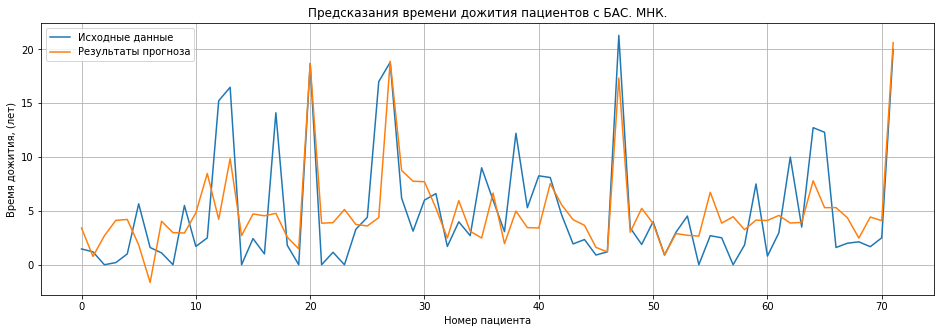

In [12]:
CreateTwoPlot(y, y_predicted, title="Предсказания времени дожития пациентов с БАС. МНК.")

<h4>Рассматриваются други модели построения регрессии</h4>

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

In [14]:
metrics = pd.DataFrame(columns=['Method','R2','RMSE', 'MAE'])

In [15]:
metrics = metrics.append({'Method':'OLS',
                          'R2':res.rsquared,
                          'RMSE':np.sqrt(mean_squared_error(y, y_predicted)),
                          'MAE':mean_absolute_error(y, y_predicted)
                         },
                         ignore_index=True)

C:\Users\Jopchiki\AppData\Local\Temp/ipykernel_9784/401389191.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Method':'OLS',


In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [17]:
def find_best_params(model, parametrs, X, y):
    grid_search_cv_clf = RandomizedSearchCV(model, parametrs, cv=3)
    grid_search_cv_clf.fit(X, y)
    print(grid_search_cv_clf.best_params_)

In [18]:
find_best_params(KNeighborsRegressor(),
                 {'n_neighbors':range(5),
                  'weights': ['uniform', 'distance'],
                  'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
                 },
                 characteristic_subgraph,
                 y
                )

{'weights': 'uniform', 'n_neighbors': 3, 'algorithm': 'ball_tree'}


D:\Diplom\BioProject\Bio\env\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
D:\Diplom\BioProject\Bio\env\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
D:\Diplom\BioProject\Bio\env\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
D:\Diplom\BioProject\Bio\env\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
D:\Diplom\BioProject\Bio\env\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
D:\Diplom\BioProject\Bio\env\lib\site-packages\sklearn\

In [19]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(characteristic_subgraph, y)
y_pred_neigh = neigh.predict(characteristic_subgraph)
metrics = pd.concat([metrics, 
           pd.DataFrame([['K_Neighbors', 
                          neigh.score(characteristic_subgraph, y), 
                          np.sqrt(mean_squared_error(y, y_pred_neigh)), 
                          mean_absolute_error(y, y_pred_neigh)]], 
                        columns=['Method','R2','RMSE', 'MAE'])
          ])

D:\Diplom\BioProject\Bio\env\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
D:\Diplom\BioProject\Bio\env\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [20]:
rf = RandomForestRegressor()
parametrs = {'n_estimators':      range(100),
             'max_depth':         range(10),
            }
find_best_params(rf,
                 parametrs,
                 characteristic_subgraph,
                 y)

{'n_estimators': 25, 'max_depth': 3}


D:\Diplom\BioProject\Bio\env\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Diplom\BioProject\Bio\env\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Diplom\BioProject\Bio\env\lib\site-packages\sklearn\ensemble\_forest.py", line 441, in fit
    trees = Parallel(
  File "D:\Diplom\BioProject\Bio\env\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Diplom\BioProject\Bio\env\li

In [21]:
rf = RandomForestRegressor(n_estimators=57,
                           max_depth = 7
                          )
rf.fit(characteristic_subgraph, y)
y_predicted_rf = rf.predict(characteristic_subgraph)

In [22]:
metrics = metrics.append({'Method':'RF',
                          'R2':rf.score(characteristic_subgraph, y),
                          'RMSE':np.sqrt(mean_squared_error(y, y_predicted_rf)),
                          'MAE':mean_absolute_error(y, y_predicted_rf)
                         },
                         ignore_index=True)

C:\Users\Jopchiki\AppData\Local\Temp/ipykernel_9784/772625757.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Method':'RF',


In [24]:
res_rlm = sm.RLM(y, characteristic_subgraph.values, M=sm.robust.norms.HuberT()).fit()
y_oz = res_rlm.predict(characteristic_subgraph)
metrics = metrics.append({'Method':'RLM',
                          'R2':'-',
                          'RMSE':np.sqrt(mean_squared_error(y, y_oz)),
                          'MAE':mean_absolute_error(y, y_oz)
                         },
                         ignore_index=True)

C:\Users\Jopchiki\AppData\Local\Temp/ipykernel_9784/1588086621.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Method':'RLM',


In [25]:
metrics

,Method,R2,RMSE,MAE
0,OLS,0.514895,3.788003,2.827046
1,K_Neighbors,0.614601,3.376354,2.353917
2,RF,0.781513,2.542173,1.955738
3,RLM,-,3.865619,2.686314


Для такого маленького набора данных была реализована кросс валидация.

In [28]:
from Bio.worker import model
cv_ols = model.cross_validation_ols_n(characteristic_subgraph.values, y, n=1)
cv_rlm = model.cross_validation_rlm_n(characteristic_subgraph.values, y, n=1)
cv_rf = model.cross_validation_model_sklearn_n(characteristic_subgraph.values, y, RandomForestRegressor(n_estimators=57, max_depth = 7), n=1)
cv_neight = model.cross_validation_model_sklearn_n(characteristic_subgraph.values, y, KNeighborsRegressor(n_neighbors=2), n=1)

In [39]:
metrics['CV_1'] = [mean_squared_error(y,cv_ols), 
                   mean_squared_error(y,cv_neight),
                   mean_squared_error(y,cv_rf),
                   mean_squared_error(y,cv_rlm)]

metrics['CV_RMSE_1'] = [np.sqrt(mean_squared_error(y,cv_ols)), 
                       np.sqrt(mean_squared_error(y,cv_neight)),
                       np.sqrt(mean_squared_error(y,cv_rf)),
                       np.sqrt(mean_squared_error(y,cv_rlm))]
metrics

,Method,R2,RMSE,MAE,CV_1,CV_RMSE_1
0,OLS,0.514895,3.788003,2.827046,14.348965,3.788003
1,K_Neighbors,0.614601,3.376354,2.353917,11.399766,3.376354
2,RF,0.781513,2.542173,1.955738,6.031240,2.455858
3,RLM,-,3.865619,2.686314,14.943008,3.865619


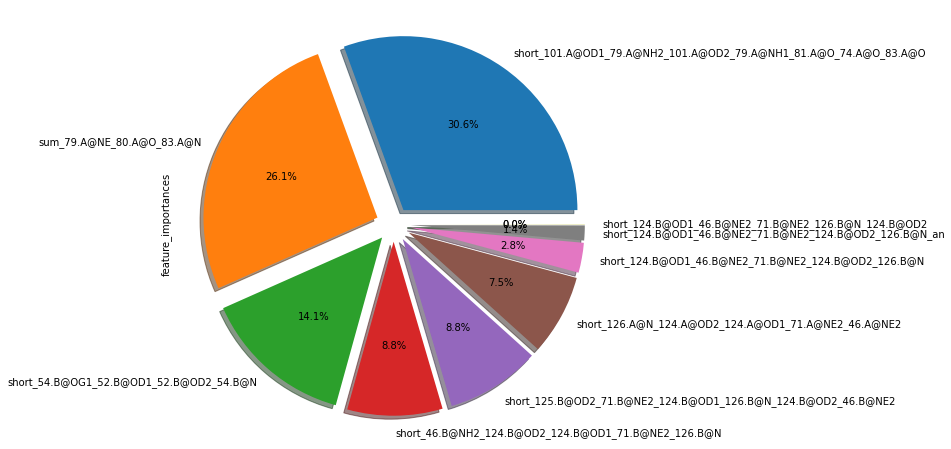

In [43]:
rf = RandomForestRegressor(n_estimators=57, max_depth = 7)
rf.fit(characteristic_subgraph, y)
feature_importances_df = pd.DataFrame({'features':list(characteristic_subgraph.columns), 
                                       'feature_importances':  rf.feature_importances_})\
                        .sort_values(by='feature_importances', ascending=False)

feature_importances_df.plot.pie(
                        explode=[0.1]*len(characteristic_subgraph.columns),
                        labels = feature_importances_df.features,
                        y = 'feature_importances',
                        autopct='%1.1f%%',
                        shadow=True,
                        legend=False,
                        figsize=(8, 8));

<AxesSubplot:>

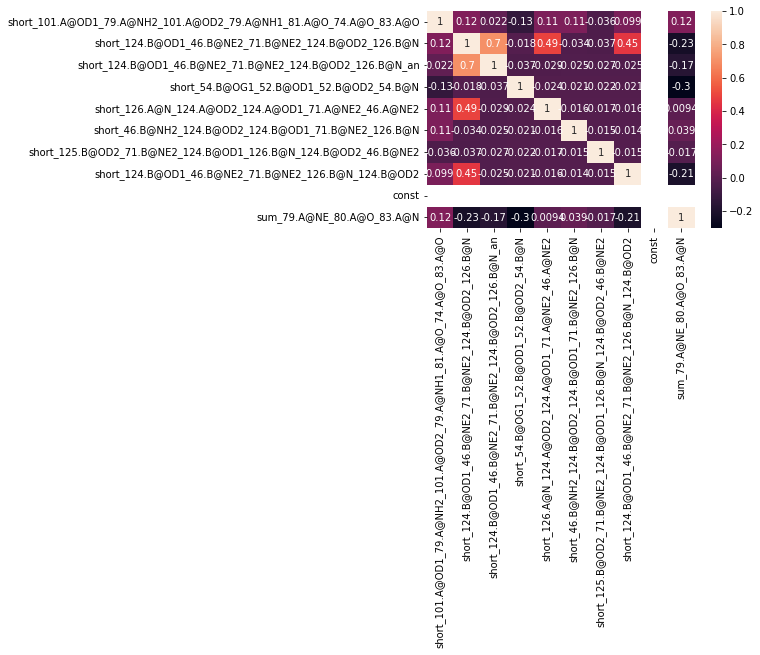

In [445]:
sns.heatmap(characteristic_subgraph.corr(),
                 cbar=True,
                 annot=True)

В данной работе был разработан метод вычисления характеристик графа водородных связей, который позволил сформировать оптимальную структуру для построения регрессионной модели. 

Данный способ – это подсчет характеристик для уникальных подграфов водородных связей.
С помощью различных методов на основе сформированной структуры была построена линейная регрессия, связывающая характеристики графа водородных связей, ассоциированных с дожитием пациентов, являющихся носителями мутаций SOD1. Были построены предсказания дожития пациентов.

После анализа результатов построенной регрессионной модели были выделены значимые участки, которые влияют на выживаемость пациентов, а также определена наилучшая модель для использования. Данной моделью является модель, построенная с помощью метода random forest.

Таким образом, с помощью нового предложенного метода по формированию структуры для регрессионной модели и построенным прогнозам получилось улучшить качество предсказаний в два раза. Предыдущие исследования показывали RMSE равную 4.47 годам, в данной работе получилось достигнуть RMSE равную 2.5 годам. Выделенные значимые участки фермента позволят в дальнейшем исследовать их и понять причину влияния на выживаемость.
